# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
w_headers = weather_soup.find_all('th')
w_data = weather_soup.find_all('tr', class_= 'data-row')

In [6]:
print("Data Rows: ", len(w_data))
for row in w_data:
    print(row.text)

Data Rows:  1867

2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
# Create an empty list
Mars_weather = []
# Loop through the scraped data to create a list of rows
for row in w_data:
    Mars_weather.append(row.get_text().replace('\n',',').strip(',').split(","))
Mars_weather


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [38]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(Mars_weather)
df.columns =['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [32]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [41]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = df['terrestrial_date'].astype('datetime64[ns]')
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [44]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [45]:
# 1. How many months are there on Mars?
print(df['month'].max())

12


In [46]:
# 2. How many Martian days' worth of data are there?
print(df['sol'].value_counts().sum())

1867


In [48]:
# 3. What is the average low temperature by month?
avg_low = df.groupby(['month']).agg({'min_temp':'mean'})
print(avg_low)

        min_temp
month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807


Text(0, 0.5, 'Temperature')

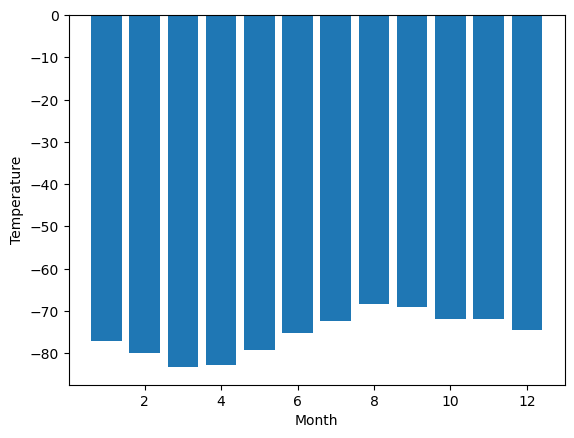

In [54]:
# Plot the average temperature by month
month = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.bar(month, avg_low['min_temp'])
plt.xlabel("Month")
plt.ylabel("Temperature")


In [58]:
# Identify the coldest and hottest months in Curiosity's location
# coldest = 3
# hottest = 8

                 id terrestrial_date  sol   ls  pressure
month min_temp                                          
1     -82.0     366       2013-09-26  405   26     879.0
      -81.0     368       2013-09-27  406    0     849.0
      -80.0     364       2013-09-24  403    9     856.0
      -79.0     332       2013-08-21  370    9     857.0
      -78.0     338       2013-08-27  376    3     851.0
...             ...              ...  ...  ...       ...
12    -74.0     269       2013-06-21  311  332     830.0
      -73.0     271       2013-06-11  301  331     830.0
      -72.0     265       2013-06-07  297  330     829.0
      -71.0     263       2013-06-05  295  330     832.0
      -70.0     281       2013-06-14  304  335     848.0

[152 rows x 5 columns]


In [59]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby(['month']).agg({'pressure':'mean'})
print(avg_pressure)

         pressure
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627


Text(0, 0.5, 'Pressure')

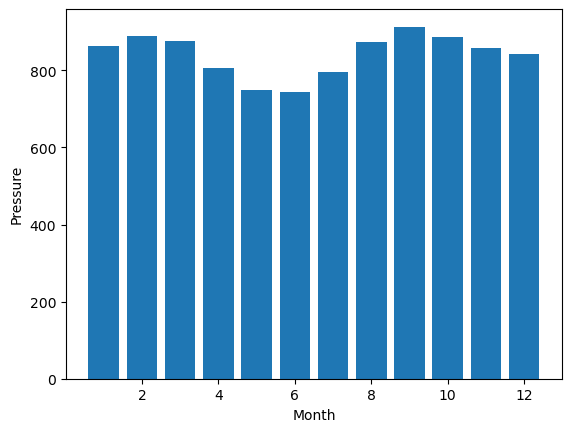

In [62]:
# Plot the average pressure by month
plt.bar(month, avg_pressure['pressure'])
plt.xlabel("Month")
plt.ylabel("Pressure")

In [66]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days = 1867/687
print(earth_days)

2.7176128093158662


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [67]:
# Write the data to a CSV
df.to_csv()

',id,terrestrial_date,sol,ls,month,min_temp,pressure\r\n0,2,2012-08-16,10,155,6,-75.0,739.0\r\n1,13,2012-08-17,11,156,6,-76.0,740.0\r\n2,24,2012-08-18,12,156,6,-76.0,741.0\r\n3,35,2012-08-19,13,157,6,-74.0,732.0\r\n4,46,2012-08-20,14,157,6,-74.0,740.0\r\n5,57,2012-08-21,15,158,6,-78.0,740.0\r\n6,68,2012-08-22,16,158,6,-77.0,740.0\r\n7,79,2012-08-23,17,159,6,-76.0,742.0\r\n8,112,2012-08-27,21,161,6,-74.0,741.0\r\n9,114,2012-08-28,22,162,6,-74.0,742.0\r\n10,123,2012-08-29,23,162,6,-75.0,741.0\r\n11,134,2012-08-30,24,163,6,-75.0,742.0\r\n12,145,2012-08-31,25,163,6,-75.0,743.0\r\n13,156,2012-09-01,26,164,6,-76.0,745.0\r\n14,163,2012-09-02,27,164,6,-75.0,743.0\r\n15,170,2012-09-03,28,165,6,-75.0,745.0\r\n16,171,2012-09-04,29,166,6,-75.0,747.0\r\n17,172,2012-09-05,30,166,6,-74.0,747.0\r\n18,173,2012-09-06,31,167,6,-74.0,745.0\r\n19,175,2012-09-08,33,168,6,-73.0,748.0\r\n20,176,2012-09-10,34,168,6,-73.0,748.0\r\n21,177,2012-09-11,35,169,6,-73.0,749.0\r\n22,178,2012-09-12,36,169,6,-73.0,750.0\

In [ ]:
browser.quit()